**CIC-Darknet2020 Analysis**

**Libraries importing and configuration**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
dataset_folder = "dataset/" 
img_folder = "imgs/"

plt.rcParams['figure.figsize'] = (18,6)
plt.rcParams["savefig.format"] = 'pdf'
plt.rcParams["savefig.dpi"] = 600
plt.rcParams.update({'font.size': 22})
if not os.path.exists('imgs'):
    os.makedirs('imgs')

In [5]:
samples = pd.read_csv(dataset_folder + 'processed_dataset/darknet_dataset_processed.csv')

**Traffic Origin (Trafik Kaynağı)**

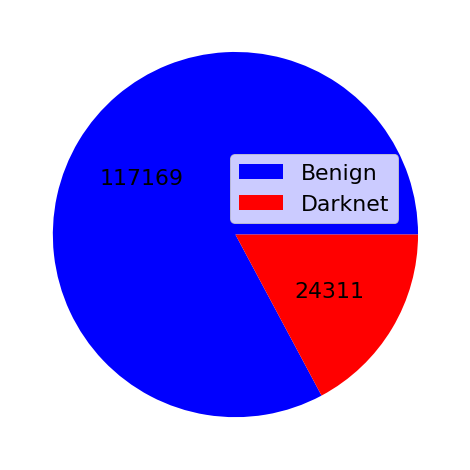

In [7]:
df = samples.groupby("Label").count()
fig, ax = plt.subplots(figsize=(7,7))
df.head()
plt.pie(df["Flow ID"], shadow=False,
         autopct=lambda x: int(df["Label.1"].values.sum()*x/100), colors=["b","r"])
plt.legend(["Benign", "Darknet"], bbox_to_anchor=(0.43,0.3,0.45,0.4),framealpha=0.8)
plt.tight_layout()
plt.savefig(img_folder+'distr_dados_ref')
plt.show()

**Labels Probability Distribution (Etiketlerin Olasılık Dağılımı)**

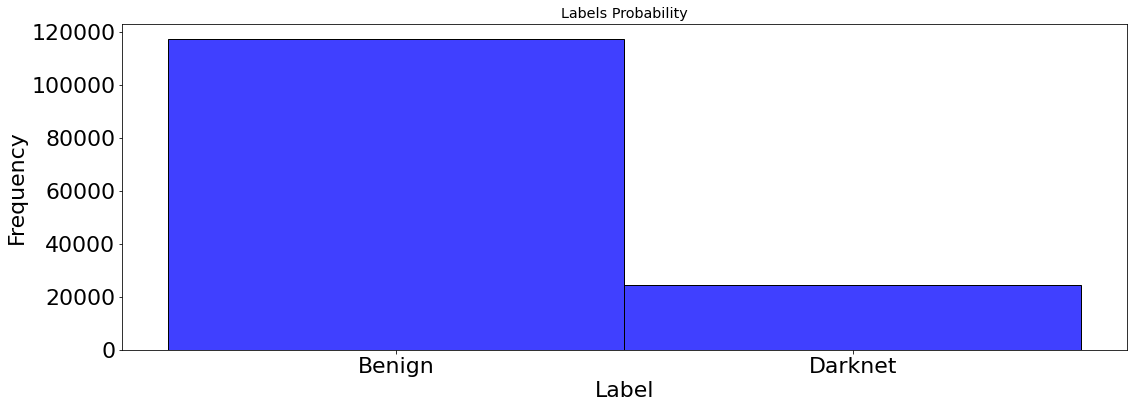

In [9]:
sns.histplot(data=samples, x="Label", stat="frequency", color="b") #histogram, stat=sayı/sıklık
plt.style.use('ggplot')
plt.title("Labels Probability")
plt.show()

**Access Hour**

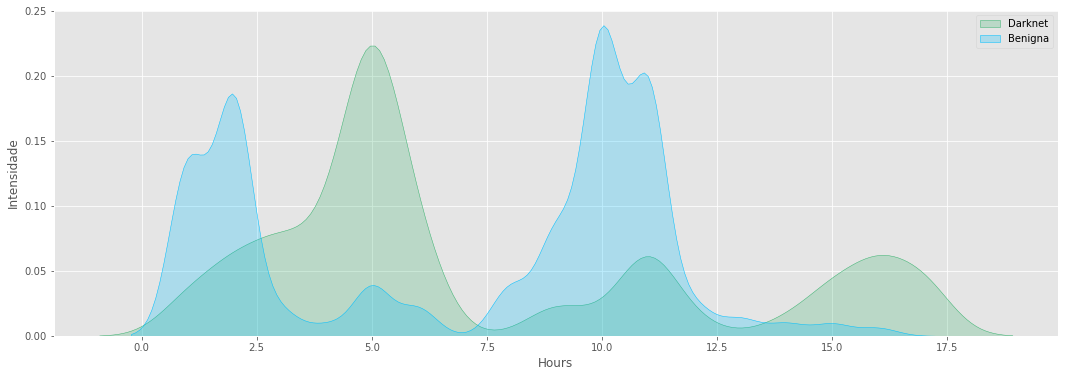

In [12]:
plot_graph_darknet = samples[samples['Label'] == "Darknet"]
plot_graph_benign = samples[samples['Label'] == "Benign"]
sns.kdeplot(plot_graph_darknet['hour'], shade=True, color="#3CB371")
sns.kdeplot(plot_graph_benign['hour'], shade=True, color="#00BFFF")
plt.xlabel("Hours") # Saatler
plt.ylabel("Intensidade") # Yoğunluk
plt.legend(['Darknet', 'Benigna'])
plt.savefig(img_folder + 'hour_relationship2')
plt.style.use('ggplot')
plt.show()

**Traffic Characterization**

**Type Of Traffic On Darknet**

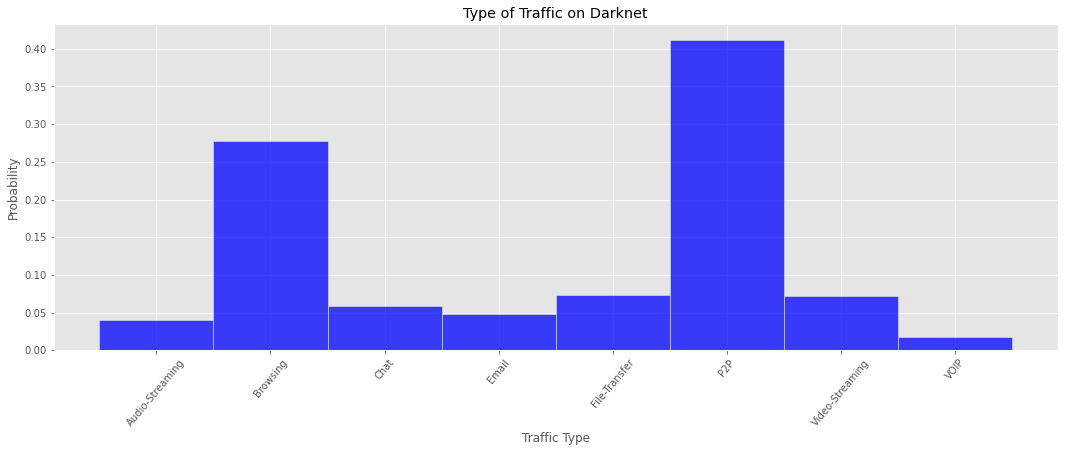

In [14]:
# Traffic Characterization (Trafik Karakterizasyonu)
# Type of Traffic on Darknet
# Normal akışta olan trafik

sns.histplot(data=samples[samples['Label'] == "Benign"], x="Label.1", stat="probability", color='b')
plt.xlabel('Traffic Type')
plt.xticks(rotation=50)
plt.title("Type of Traffic on Darknet")
plt.savefig('imgs/type_of_traffic_on_darknet')
plt.show()

**Type Of Traffic Outside The Darknet**

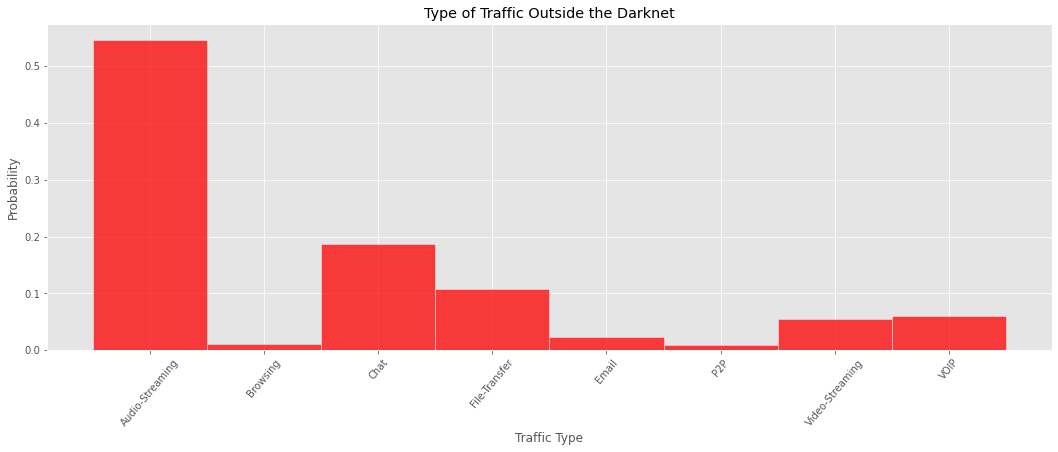

In [15]:
# Type of Traffic Outside the Darknet
# Anomali olan trafik
# Audio-streaming -> ses akışı

sns.histplot(data=samples[samples['Label'] == "Darknet"], x="Label.1", stat="probability",color='r')
plt.xlabel('Traffic Type')
plt.title("Type of Traffic Outside the Darknet")
plt.xticks(rotation=50)
plt.savefig('imgs/type_of_traffic_outside_the_darknet')
plt.show()

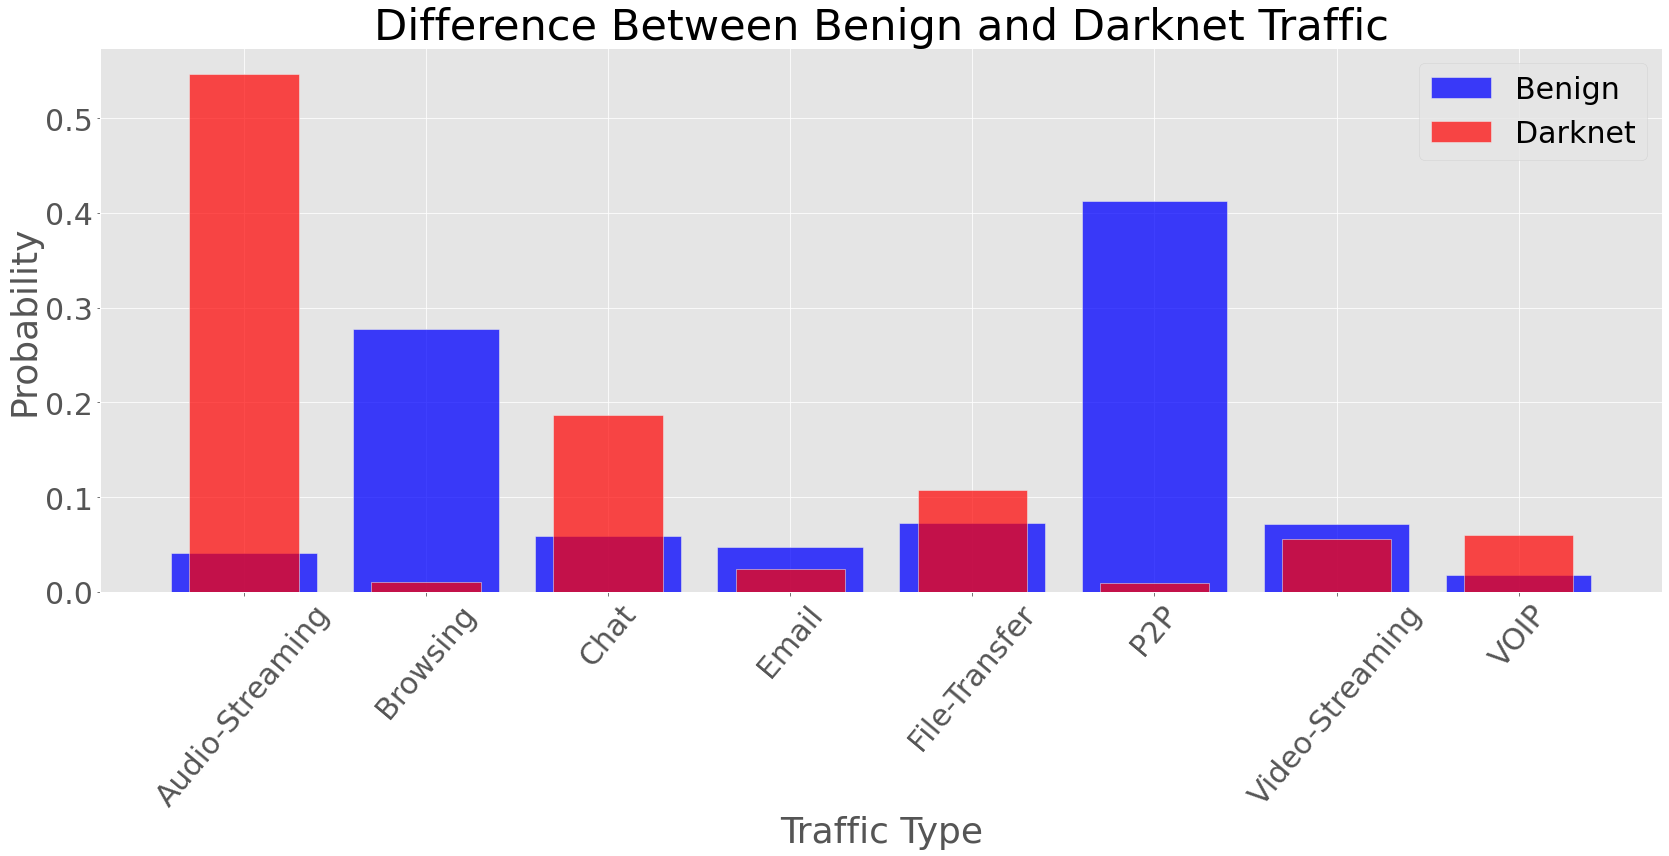

In [16]:
# İki grafik bir araya getirilip aradaki farkın daha iyi anlaşılması sağlanacaktır.
plt.rcParams.update({'font.size': 30})

plt.figure(figsize=(28,10))
sns.histplot(data=samples[samples['Label'] == "Benign"],x="Label.1", stat="probability", shrink=0.8, label='Benign', color="b")
sns.histplot(data=samples[samples['Label'] == "Darknet"], x="Label.1", stat="probability",shrink=0.6, label="Darknet", alpha=0.7, color="r")
plt.title("Difference Between Benign and Darknet Traffic")
plt.xlabel('Traffic Type')
plt.ylabel("Probability")
plt.legend() # legend için gerekli
plt.style.use('ggplot')
plt.xticks(rotation=50)
plt.savefig('traffic_enforcement_relationship.pdf')
plt.show()